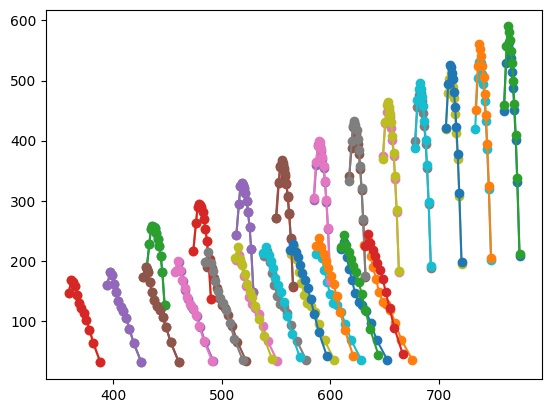

In [35]:
import sys,os
sys.path.append('../LLM/')
sys.path.append('../../../')
from paths import *
from LLM_paths import *
from dadapy import data
import numpy as np
from time import time
import matplotlib.pyplot as plt 

start = time()
from utils import *


sub_lengths = np.arange(100,300+1,20,dtype=int)
N_batches = 50
batch_randomize = 0
batch_size = 100
max_length = 400
corpus = 'Wikitext'
LLM = 'Pythia'
randomize = 0
Lconcat = 150 
sublength_cutoff = 300

batch_randomize_flags = [0,1]
layer_ids = [0,24]
normalize = 1
ID_GRIDE = np.zeros(shape=(len(layer_ids),
                         len(sub_lengths),
                         len(batch_randomize_flags))
)

fig,ax = plt.subplots(1)

for batch_r_id,batch_randomize in enumerate(batch_randomize_flags):
  for layer_index,layer_id in enumerate(layer_ids):
    for sub_length_id,sub_length in enumerate(sub_lengths):
      resultsfolder = makefolder(base=f'results/',
                              create_folder=False,
                              #  precision=2,
                              batch_randomize=batch_randomize,
                              Ns=N_batches*batch_size,
                              layer_id=layer_id,
                              sub_length=sub_length,
                              )
      filename='gride.txt'
      (ids_gride,ids_err_gride,rs_gride) = np.loadtxt(resultsfolder+filename,unpack=True)
      ax.plot(rs_gride,ids_gride,marker='o',label='')
      selected_scale_id = 1
      ID_GRIDE[layer_index,sub_length_id,batch_r_id] = ids_gride[selected_scale_id]
plt.show()

if normalize:
  emb_dim = 1024
  for batch_r_id,batch_randomize in enumerate(batch_randomize_flags):
    for layer_index,layer_id in enumerate(layer_ids):
      for sub_length_id,sub_length in enumerate(sub_lengths):
        normalization = sub_length*emb_dim
        ID_GRIDE[layer_index,sub_length_id,batch_r_id] /= normalization

p=array([-0.22, -5.08])
cov=array([[ 7.58e-05, -3.97e-04],
       [-3.97e-04,  2.09e-03]])
p=array([-0.71, -3.15])
cov=array([[ 4.16e-05, -2.18e-04],
       [-2.18e-04,  1.15e-03]])


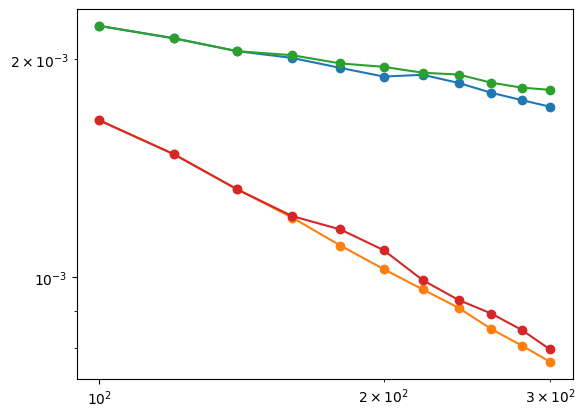

In [36]:
fig,ax = plt.subplots(1)

for batch_r_id,batch_randomize in enumerate(batch_randomize_flags):
  for layer_index,layer_id in enumerate(layer_ids):
    lbl = f"l={layer_id}"
    if batch_randomize:
      lbl += ' Concat'
    ax.plot(sub_lengths,
            ID_GRIDE[layer_index,:,batch_r_id], 
            label=lbl,
            marker='o',
            )
    if batch_r_id == 0:
      p,cov = np.polyfit(np.log(sub_lengths),np.log(ID_GRIDE[layer_index,:,batch_r_id]),deg=1,cov=True)
      print(f'{p=}')
      print(f'{cov=}')


ax.set_yscale('log')
ax.set_xscale('log')